# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)
print("u: ", u, "\n\ns: ", s, "\n\nvh: ", vh)
print("\n\n", sum(np.array([np.array([u[j][i]*s[i]*vh[i] for j in range(min(A.shape))]) for i in range(min(A.shape))])))

u:  [[-0.48835631 -0.87264432]
 [-0.87264432  0.48835631]] 

s:  [1.02285697 0.11731846] 

vh:  [[-0.38900195 -0.92123693]
 [ 0.92123693 -0.38900195]]


 [[0.1 0.5]
 [0.4 0.8]]


#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    u, s, vh=svd(A)
    trueSigma=np.zeros((max(u.shape[1], s.shape[0]), s.shape[0]))
    trueSigma[:u.shape[1]][:s.shape[0]]=np.diag(s)
    test=u.dot(trueSigma).dot(vh)
    return np.allclose(A, test)

'''Decidi implementar la reconstruccion tradicional de un svd por medio de multiplicacion de matrices. Para ello, 
se disenha un sigma que sirva (pues como nos dan solamente los valores de sigma en un array, debemos reconstruirlo
a matriz) y dicha matriz debe tener desde luego las dimensiones adecuadas para poder
hacer la multiplicacion.
'''

'Decidi implementar la reconstruccion tradicional de un svd por medio de multiplicacion de matrices. Para ello, \nse disenha un sigma que sirva (pues como nos dan solamente los valores de sigma en un array, debemos reconstruirlo\na matriz) y dicha matriz debe tener desde luego las dimensiones adecuadas para poder\nhacer la multiplicacion.\n'

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

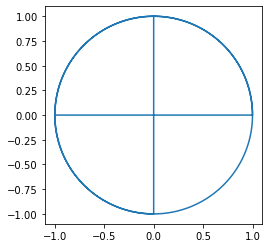

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


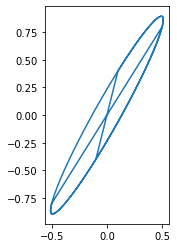

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)

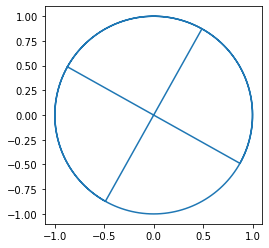

In [11]:
show_circle(u@circle)

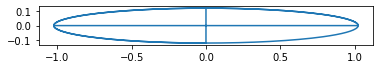

In [12]:
show_circle(np.diag(s)@circle)

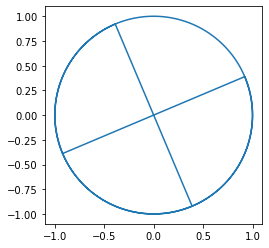

In [13]:
show_circle(vh@circle)

__Respuesta:__ Los operadores lineales se pueden pensar que consisten en 3 componentes; una rotacion, una dilatiacion y una nueva rotacion. Las rotaciones son unitarias, es decir, llevan la esfera a otra esfera solamente; en particular, se quiere alinear los vectores propios con los valores propios del sistema con los ejes canonicos. Esto porque la dilatacion, dada por sigma, es diagonal y solo funciona sobre los vectores canonicos; aca recien se cambia de una esfera a una elipse. Finalmente, se alinean los vectores dilatados de nuevo con la imagen de los vectores propios del sistema. Dicho proceso de ve claramente enlo anterior; la "rotacion de entrada" en vh, la dilatacion en elipse en sigma, y la "rotacion de salida" en u. Las siguientes 3 figuras pueden ayudar: esta el proceso compuesto, llegando hasta al final, que coincide con la elipse que grafica A.

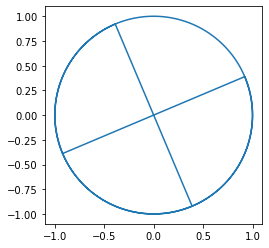

In [14]:
show_circle(vh@circle)

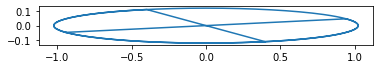

In [15]:
show_circle(np.diag(s).dot(vh)@circle)

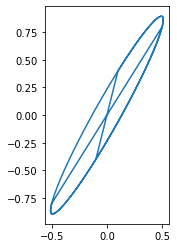

In [16]:
show_circle(u.dot(np.diag(s)).dot(vh)@circle)

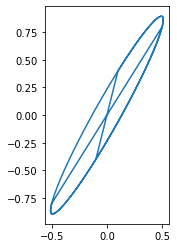

In [17]:
show_circle(A@circle)

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [18]:
from pathlib import Path
from PIL import Image

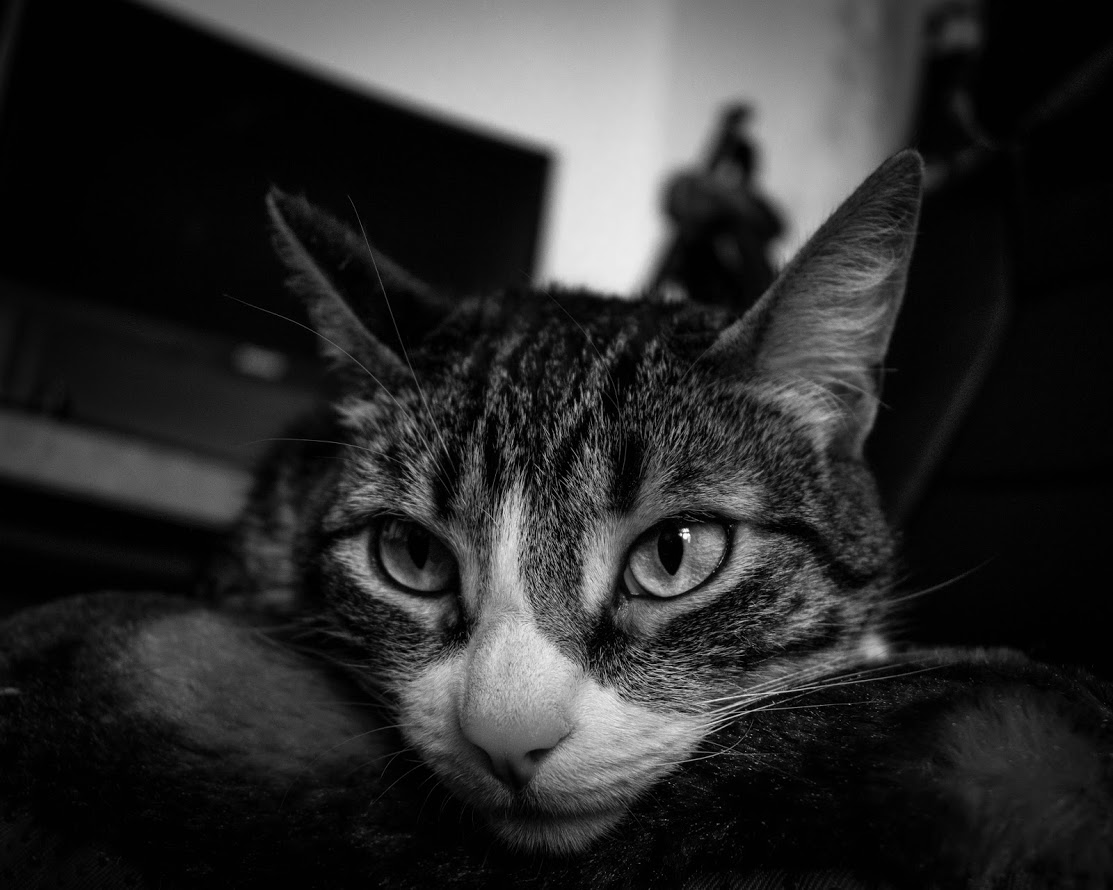

In [19]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [20]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [21]:
def low_rank_svd_approximation(A, l):
    u,s, vh=svd(A)
    app=sum(np.array([np.array([u[j][i]*s[i]*vh[i] for j in range(min(A.shape))]) for i in range(l)]))
    print(sum(sum((A-app)**2))**0.5)
    return app

16045.719714863797


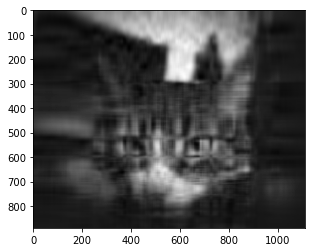

In [22]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

8144.192704699422


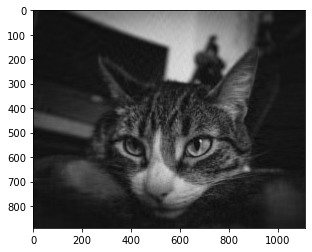

In [23]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [24]:
def low_rank_svd_tol_approximation(A, tol):
    u, s, vh=svd(A)
    #Si le pides demaciada poca tolerancia a la matriz, devuelvela no mas que no hay app
    if s[-1]**2/sum(s[:-1]**2)>tol**2:
        return A
    i=1
    while sum(s[i:]**2)/sum(s[0:i]**2)>tol**2:
        i=i+1
    print(i)
    return low_rank_svd_approximation(A, i)

64
7211.454682614618


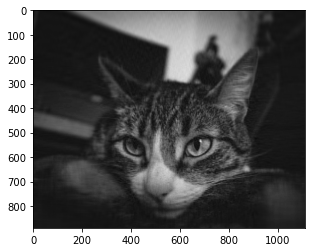

In [25]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

457
721.6597439522727


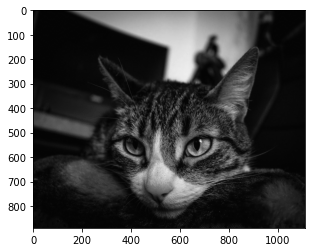

In [26]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

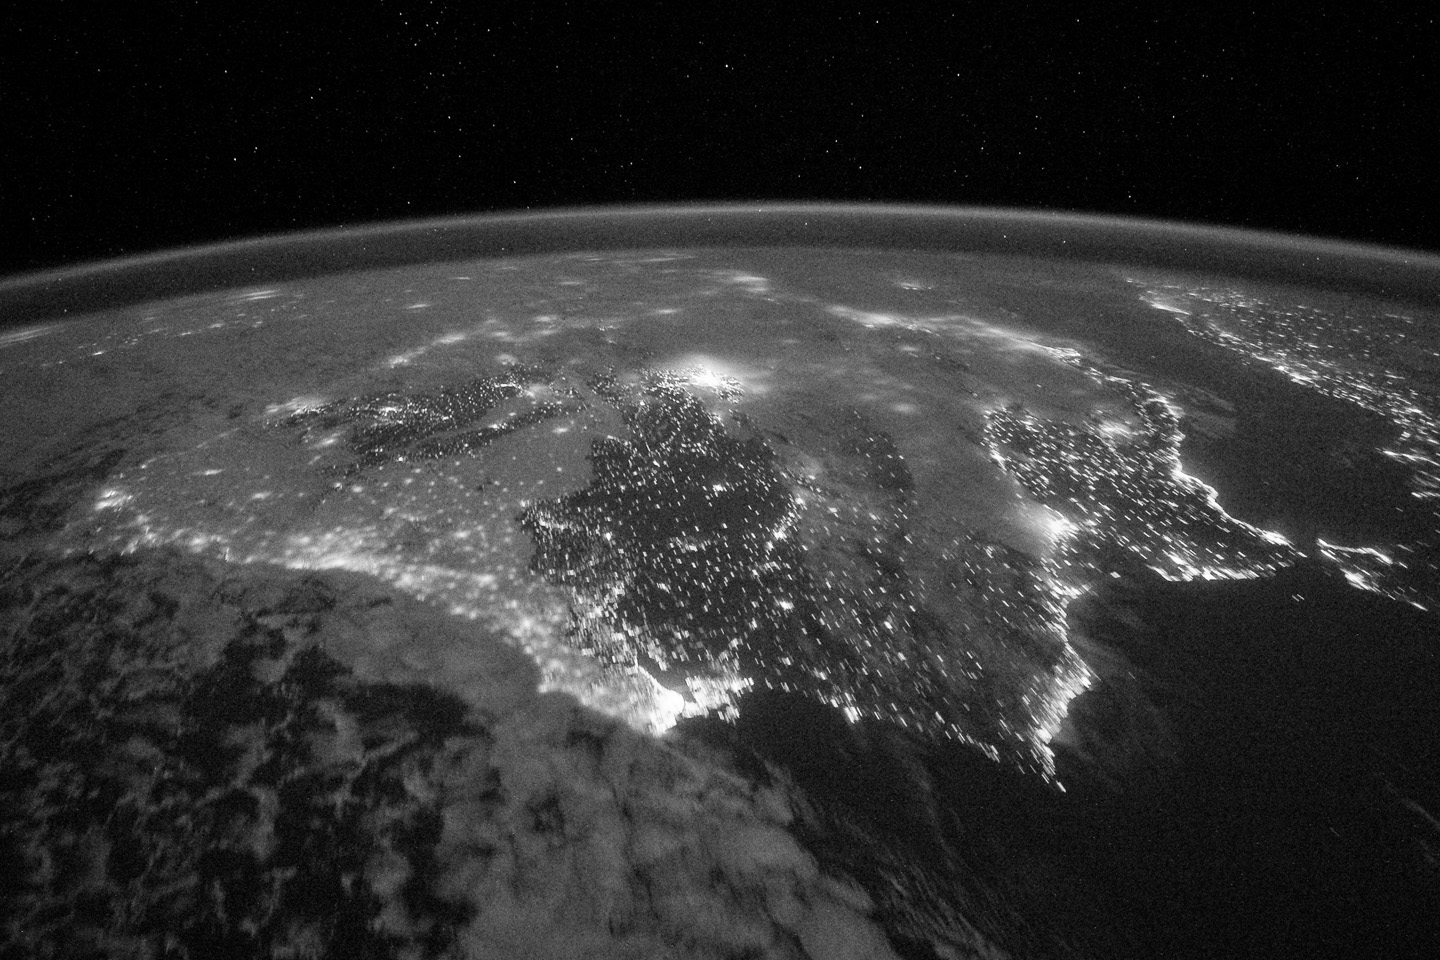

In [27]:
your_img_name = "IberianNight.jpg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [28]:
your_img_np = np.array(your_img)
print(your_img_np.shape)

(960, 1440)


21038.46441379753


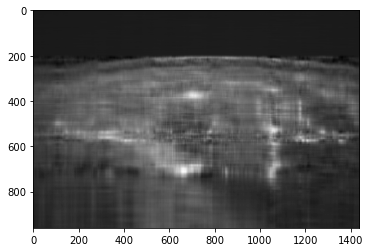

In [29]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

18098.486026115555


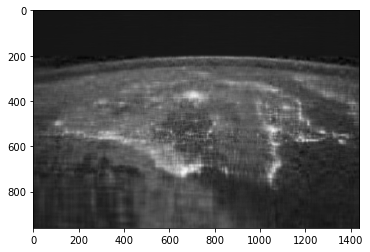

In [30]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

168
7958.903081195258


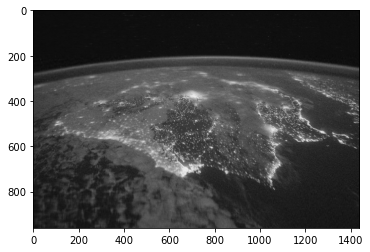

In [31]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

756
798.2294961677663


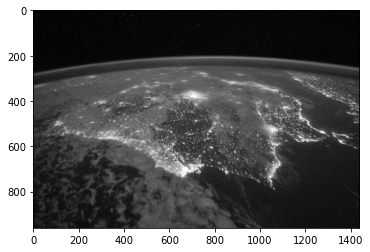

In [32]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Como todo en la vida, depende del uso que se le quiera dar; dependiendo del tamanho de la imagen, el algoritmo puede tomar un buen tiempo incluso en hacer la mas simple de las codificaciones. De hecho, se tuvo que cambiar la imagen de referencia entre medio realizando este ejercicio. Sin embargo, es innegable que en algunos casos, pueda cumplir el trabajo, dependiendo del tamanho y calidad original de la imagen. Acerca de otras formas mas eficientes, de nuevo, continua siendo relativo al uso que se le quiera dar; hay algoritmos que intentan "reconstruir" la resolucion de una imagen a partir de un comprimido, que puede ser o no util dependiendo del tipo de imagen. Si uno tiene espacio suficiente, mejor dejarlo asi en el disco duro no mas de todas formas para todos los casos suficientemente pequenhos, para no perder fidelidad.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [33]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [34]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [35]:
dates_dt=list()
dates_str=list()
for date in covid_comunas.keys():
    try:
        dates_dt.append(pd.to_datetime(date, format="%Y-%m-%d"))
        dates_str.append(date)
    except:
        pass
dates_dt=pd.Series(dates_dt)
print("min date: ", dates_dt.min(), "\n\nmax date: ", dates_dt.max())

min date:  2020-03-30 00:00:00 

max date:  2020-10-30 00:00:00


In [36]:
start_date = pd.to_datetime("2020-10-1", format="%Y-%m-%d")
end_date = pd.to_datetime("2020-10-31", format="%Y-%m-%d")

In [66]:
build_df=covid_comunas #Se define un nuevo dataframe para no alterar el original; un detalle

build_df.dropna(subset=["comuna"], inplace=True) #Limpieza de codigo, se eliminan comunas na y se llena poblacion "vacia"
build_df["poblacion"].fillna(0, inplace=True)

#Se define el dataframe de melt, se cambia el formato de fechas, se reordena, se redefine index para no tener complicaciones
build_melt_df=pd.melt(build_df, id_vars=["region", "comuna", "poblacion"], value_vars=dates_str, var_name="fecha", value_name="casos_totales")
build_melt_df["fecha"]=pd.to_datetime(build_melt_df["fecha"])
build_melt_df.sort_values(by=["comuna", "fecha"], inplace=True)
build_melt_df.index=pd.Series(range(len(build_melt_df)))
build_melt_df["casos_totales"].fillna(0, inplace=True)

#Se "corre en uno" los datos; asi podemos definir facilmente los nuevos datos restando dos series. Esto solo funciona porque
#Sabemos de antemano que el primer dia no se tendra en consideracion, que seria un conjunto de datos falsos, que de toda forma
#Seria facil de arreglar fijando ese dia como NaN. Sin embargo, por simplicidad, se opta por no hacerlo.
#Se crea un 0, y se agrega los que siguen antes del ultimo de casos totales

casos_corridos=pd.Series([0.0])
casos_corridos.index=pd.Series([-1])
temp=build_melt_df["casos_totales"][:-1]
casos_corridos=casos_corridos.append(temp)
casos_corridos.index=pd.Series(range(len(casos_corridos)))

#Se redefine casos totales y se filtran las fechas
build_melt_df["casos_totales"]=build_melt_df["casos_totales"]-casos_corridos
build_melt_df=build_melt_df[build_melt_df["fecha"]>=start_date]
build_melt_df=build_melt_df[build_melt_df["fecha"]<=end_date]

#Se realiza el groupby y se redefine el nombre de casos totales a promedio dcasos nuevos; se agrega la tasa de casos nuevos.
covid_tasa_promedio_nuevos=build_melt_df.groupby(by=["region", "comuna"]).mean().query("poblacion>0")
covid_tasa_promedio_nuevos.rename(columns={"casos_totales": "promedio_casos_nuevos"}, inplace=True)
covid_tasa_promedio_nuevos["tasa_promedio_nuevos_casos"]=covid_tasa_promedio_nuevos["promedio_casos_nuevos"]*100000/covid_tasa_promedio_nuevos["poblacion"]
covid_tasa_promedio_nuevos.sort_values(by="tasa_promedio_nuevos_casos", inplace=True, ascending=False)
display(covid_tasa_promedio_nuevos)

poblacion  promedio_casos_nuevos  \
region     comuna                                           
Magallanes Timaukel          282.0               2.111111   
           Natales         23782.0             100.666667   
           Porvenir         7323.0              23.777778   
           San Gregorio      681.0               2.000000   
           Punta Arenas   141984.0             384.333333   
...                            ...                    ...   
Los Lagos  Chaiten          5020.0               0.000000   
           Palena           1827.0               0.000000   
Magallanes Antartica         137.0               0.000000   
Tarapacá   Colchane         1583.0               0.000000   
Coquimbo   La Higuera       4450.0               0.000000   

                         tasa_promedio_nuevos_casos  
region     comuna                                    
Magallanes Timaukel                      748.620961  
           Natales                       423.289322  
           Porvenir                      324.699956  
           San Gregorio                  293.685756  
           Punta Arenas                  270.687777  
...                                             ...  
Los Lagos  Chaiten                         0.000000  
           Palena                          0.000000  
Magallanes Antartica                       0.000000  
Tarapacá   Colchane                        0.000000  
Coquimbo   La Higuera                      0.000000  

[346 rows x 3 columns]

In [65]:
covid_tasa_promedio_nuevos

poblacion  promedio_casos_nuevos  \
region     comuna                                           
Magallanes Timaukel          282.0               2.111111   
           Natales         23782.0             100.666667   
           Porvenir         7323.0              23.777778   
           San Gregorio      681.0               2.000000   
           Punta Arenas   141984.0             384.333333   
...                            ...                    ...   
Los Lagos  Chaiten          5020.0               0.000000   
           Palena           1827.0               0.000000   
Magallanes Antartica         137.0               0.000000   
Tarapacá   Colchane         1583.0               0.000000   
Coquimbo   La Higuera       4450.0               0.000000   

                         tasa_promedio_nuevos_casos  
region     comuna                                    
Magallanes Timaukel                      748.620961  
           Natales                       423.289322  
           Porvenir                      324.699956  
           San Gregorio                  293.685756  
           Punta Arenas                  270.687777  
...                                             ...  
Los Lagos  Chaiten                         0.000000  
           Palena                          0.000000  
Magallanes Antartica                       0.000000  
Tarapacá   Colchane                        0.000000  
Coquimbo   La Higuera                      0.000000  

[346 rows x 3 columns]

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [67]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [68]:
dates_dt=list()
dates_str=list()
for date in covid_pcr.keys():
    try:
        dates_dt.append(pd.to_datetime(date, format="%Y-%m-%d"))
        dates_str.append(date)
    except:
        pass
dates_dt=pd.Series(dates_dt)
print("min date: ", dates_dt.min(), "\n\nmax date: ", dates_dt.max())

min date:  2020-04-09 00:00:00 

max date:  2020-10-31 00:00:00


In [69]:
covid_pcr_melt = (
    pd.melt(covid_pcr, id_vars=["region"], value_vars=dates_str, var_name="fecha", value_name="nm_pcr")
)
covid_pcr_melt["fecha"]=pd.to_datetime(covid_pcr_melt["fecha"])
covid_pcr_melt.sort_values(by=["region", "fecha"], inplace=True)
covid_pcr_melt.index=pd.Series(range(len(covid_pcr_melt)))
covid_pcr_melt.fillna(0, inplace=True)

covid_pcr_melt.head()

,region,fecha,nm_pcr
0,Antofagasta,2020-04-09,182.0
1,Antofagasta,2020-04-10,128.0
2,Antofagasta,2020-04-11,107.0
3,Antofagasta,2020-04-12,175.0
4,Antofagasta,2020-04-13,103.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [70]:
dates_dt=list()
dates_str=list()
for date in covid_comunas.keys():
    try:
        dates_dt.append(pd.to_datetime(date, format="%Y-%m-%d"))
        dates_str.append(date)
    except:
        pass
dates_dt=pd.Series(dates_dt)
print("min date: ", dates_dt.min(), "\n\nmax date: ", dates_dt.max())

min date:  2020-03-30 00:00:00 

max date:  2020-10-30 00:00:00


In [71]:
covid_casos_melt = (
    pd.melt(covid_comunas, id_vars=["region"], value_vars=dates_str, var_name="fecha", value_name="casos_totales")
)
covid_casos_melt["fecha"]=pd.to_datetime(covid_casos_melt["fecha"])
covid_casos_melt=covid_casos_melt.groupby(by=["region", "fecha"]).sum()
covid_casos_melt

casos_totales
region      fecha                    
Antofagasta 2020-03-30           29.0
            2020-04-01           32.0
            2020-04-03           49.0
            2020-04-06           65.0
            2020-04-08           72.0
...                               ...
Ñuble       2020-10-16         9129.0
            2020-10-19         9270.0
            2020-10-24         9534.0
            2020-10-26         9634.0
            2020-10-30         9815.0

[1024 rows x 1 columns]

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [72]:
covid_corr_casos_pcr = (
    covid_pcr_melt.merge(covid_casos_melt, how="outer", on=["region", "fecha"])
)
covid_corr_casos_pcr["nm_pcr"]=covid_corr_casos_pcr["nm_pcr"].fillna(0)
covid_corr_casos_pcr["casos_totales"]=covid_corr_casos_pcr["casos_totales"].ffill().fillna(0)
display(covid_corr_casos_pcr.groupby(by="region").corr().sort_values(["nm_pcr", "casos_totales"], ascending=[False, False]))

,,nm_pcr,casos_totales
region,,,
Arica y Parinacota,nm_pcr,1.000000,0.858982
Valparaíso,nm_pcr,1.000000,0.839357
Maule,nm_pcr,1.000000,0.828340
Biobío,nm_pcr,1.000000,0.813198
Coquimbo,nm_pcr,1.000000,0.802019
Los Lagos,nm_pcr,1.000000,0.786555
Antofagasta,nm_pcr,1.000000,0.770023
Araucanía,nm_pcr,1.000000,0.756537
Tarapacá,nm_pcr,1.000000,0.746542


__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ La correlacion varia a lo largo del pais, pero siempre es mayor a 0. Hay dos posibles explicaciones de manera intuitiva para esto: 1, simplemente aumento el numero de testeos y de casos con el paso del tiempo por mayor exposicion y o preocupacion por el covid; o 2, mayor cantidad de testeos puede llevar a mayor deteccion de infectados, y mayor cantidad de infectados puede aumentar la necesidad o preocupacion por hacer testeos (ej: personal de salud). De todas formas, la correlacion es positiva, y estan correlacionados estadisticamente hablando.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [45]:
# FIX ME PLEASE #

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [46]:
# FIX ME PLEASE #

__Respuesta:__